In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('newdata.csv')
df=df.drop(['month','day'], axis=1)

In [ ]:
df.head()

,year,tempavg,DPavg,humidity avg,SLPavg,visibilityavg,windavg,Rainfall
0,2011,23,16,70,1012,4,11,0.00
1,2011,24,17,70,1014,3,17,0.00
2,2011,24,11,60,1014,3,5,0.09
3,2011,23,13,53,1016,3,3,0.03
4,2011,31,16,74,1011,3,3,0.00


In [ ]:
df.isnull().sum()

year             0
tempavg          0
DPavg            0
humidity avg     0
SLPavg           0
visibilityavg    0
windavg          0
Rainfall         0
dtype: int64

In [ ]:
df.columns

Index(['year', 'tempavg', 'DPavg', 'humidity avg', 'SLPavg', 'visibilityavg',
       'windavg', 'Rainfall'],
      dtype='object')

In [ ]:
for col in df.columns:

  # Checking if the column contains
  # any null values
  if df[col].isnull().sum() > 0:
    val = df[col].mean()
    df[col] = df[col].fillna(val)

df.isnull().sum().sum()

0

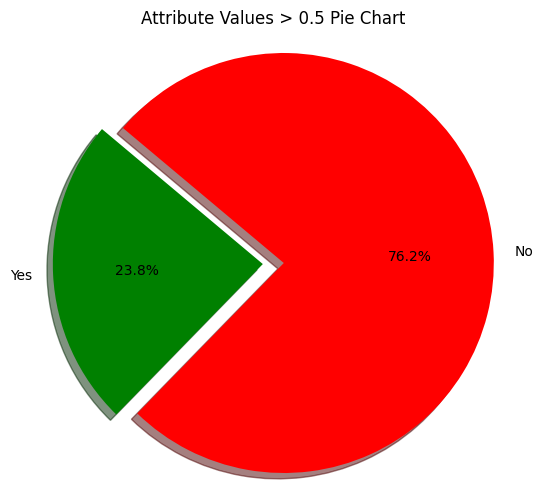

In [ ]:
# Extract the values of the desired attribute column
attribute_values = df['Rainfall'].values  # Replace 'attribute_column_name' with the actual column name from your CSV file

# Count 'Yes' and 'No'
yes_count = sum(1 for val in attribute_values if val > 0.5)
no_count = len(attribute_values) - yes_count

# Data to plot
labels = ['Yes', 'No']
sizes = [yes_count, no_count]
colors = ['green', 'red']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Attribute Values > 0.5 Pie Chart')
plt.show()


In [ ]:
x=df.iloc[:,:7].values     #Assigning variables to the dependent and independent attiributes
y=df.iloc[:,7].values

In [ ]:
features = list(df.select_dtypes(include = np.number).columns)
print(features)

['year', 'tempavg', 'DPavg', 'humidity avg', 'SLPavg', 'visibilityavg', 'windavg', 'Rainfall']


Relationship Graphs

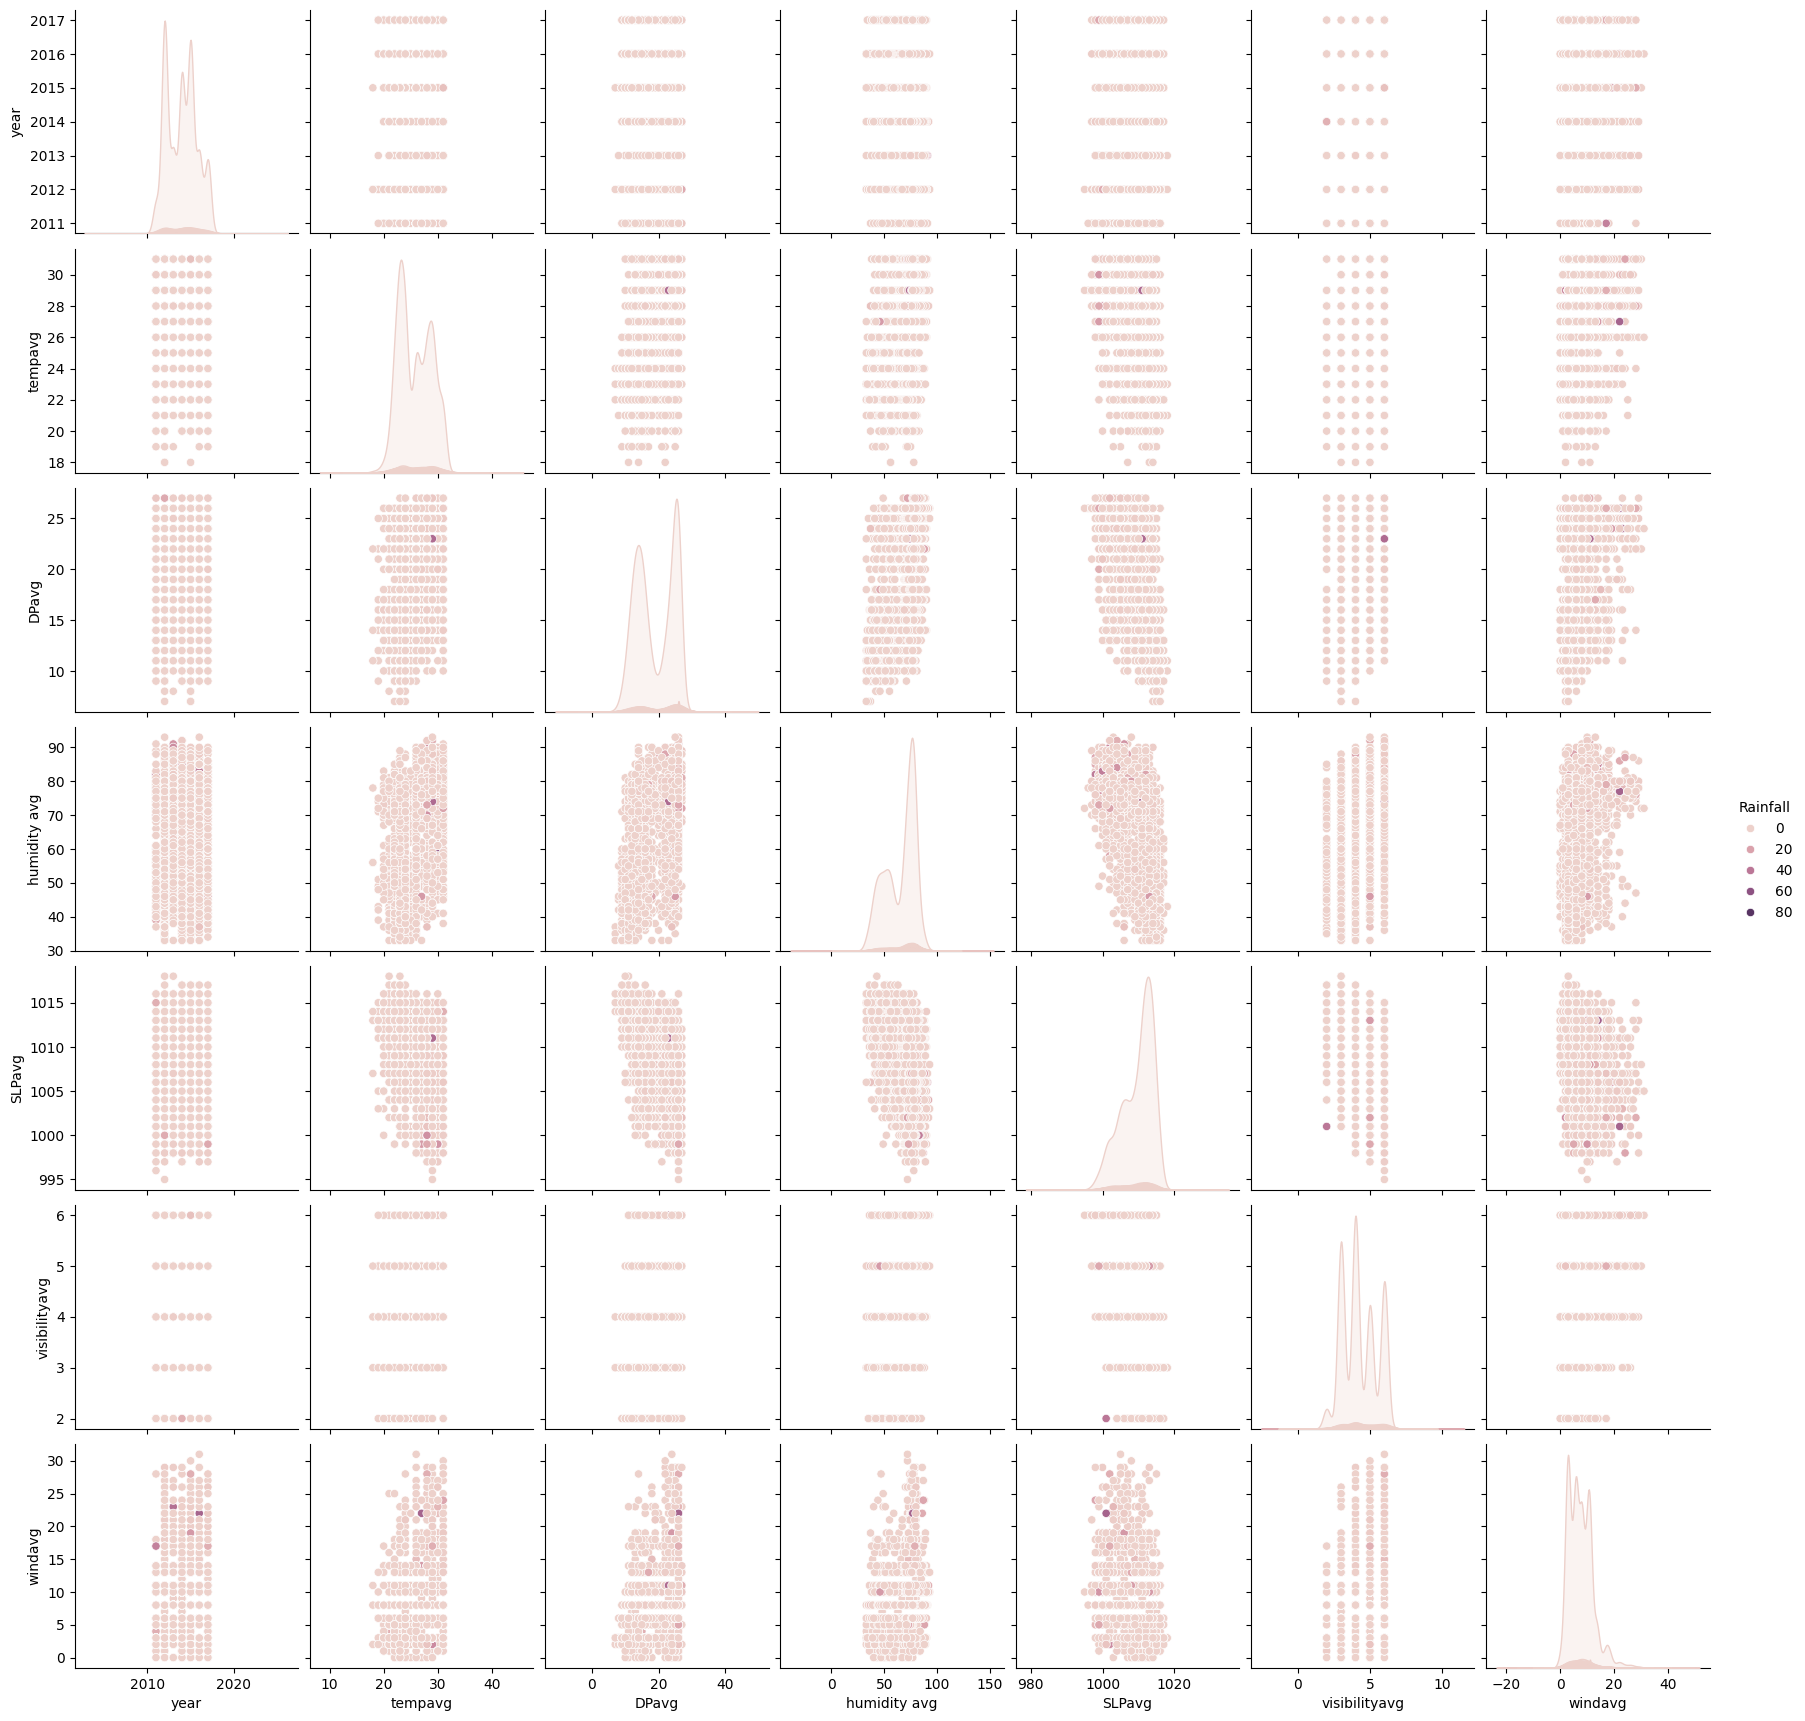

In [ ]:
# checks = ['Temperature','DP avg','Humidity', 'SLP', 'visibilty', 'Wind']
# for i in range(6):

#   plt.scatter(x_train[:,i],y_train,color='blue')
#   plt.title('Rainfall prediction (Training set)')
#   plt.xlabel(checks[i])
#   plt.ylabel('Rainfall')
#   plt.show()

sb.pairplot(df, hue='Rainfall')

<Axes: >

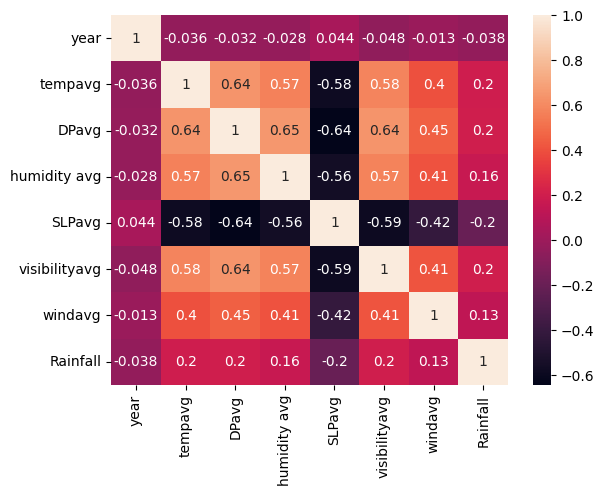

In [ ]:
sb.heatmap(df.corr(),annot=True)

Train Test Split

DATA VALIDATION

In [ ]:
import csv
import datetime

class RainfallDataValidator:
    def __init__(self):
        pass

    def validate_date(self, year, month, day):
        try:
            # Attempt to create a date object from the provided year, month, and day
            datetime.datetime(year, month, day)
            return True
        except ValueError:
            return False

    def validate_float(self, value):
        try:
            float(value)
            return True
        except ValueError:
            return False

    def validate_rainfall_data(self, data):
        # Validate each attribute of the rainfall data
        valid = True
        if not self.validate_date(int(data['year']), int(data['month']), int(data['day'])):
            print("Invalid date:", data['year'], data['month'], data['day'])
            valid = False
        if not self.validate_float(data['tempavg']):
            print("Invalid tempavg:", data['tempavg'])
            valid = False
        if not self.validate_float(data['DPavg']):
            print("Invalid DPavg:", data['DPavg'])
            valid = False
        if not self.validate_float(data['humidity avg']):
            print("Invalid humidity avg:", data['humidity avg'])
            valid = False
        if not self.validate_float(data['SLPavg']):
            print("Invalid SLPavg:", data['SLPavg'])
            valid = False
        if not self.validate_float(data['visibilityavg']):
            print("Invalid visibilityavg:", data['visibilityavg'])
            valid = False
        if not self.validate_float(data['windavg']):
            print("Invalid windavg:", data['windavg'])
            valid = False
        if not self.validate_float(data['Rainfall']):
            print("Invalid Rainfall:", data['Rainfall'])
            valid = False

        return valid

# Create an instance of the validator
validator = RainfallDataValidator()

# Open the CSV file and validate each row of data
with open('newdata.csv', 'r') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        print("Validating row:", row)
        is_valid = validator.validate_rainfall_data(row)
        if is_valid:
            print("Row is valid.")
        else:
            print("Row is not valid.")
        print()  # Add a blank line for readability


Streaming output truncated to the last 5000 lines.

Validating row: {'year': '2015', 'month': '3', 'day': '27', 'tempavg': '26', 'DPavg': '26', 'humidity avg': '73', 'SLPavg': '1012', 'visibilityavg': '5', 'windavg': '10', 'Rainfall': '0.02'}
Row is valid.

Validating row: {'year': '2015', 'month': '3', 'day': '19', 'tempavg': '26', 'DPavg': '12', 'humidity avg': '71', 'SLPavg': '1007', 'visibilityavg': '4', 'windavg': '10', 'Rainfall': '0'}
Row is valid.

Validating row: {'year': '2015', 'month': '3', 'day': '28', 'tempavg': '29', 'DPavg': '16', 'humidity avg': '79', 'SLPavg': '1000', 'visibilityavg': '6', 'windavg': '8', 'Rainfall': '0.13'}
Row is valid.

Validating row: {'year': '2015', 'month': '3', 'day': '4', 'tempavg': '29', 'DPavg': '23', 'humidity avg': '80', 'SLPavg': '1011', 'visibilityavg': '5', 'windavg': '5', 'Rainfall': '0'}
Row is valid.

Validating row: {'year': '2015', 'month': '3', 'day': '25', 'tempavg': '28', 'DPavg': '26', 'humidity avg': '73', 'SLPavg': '1010', '

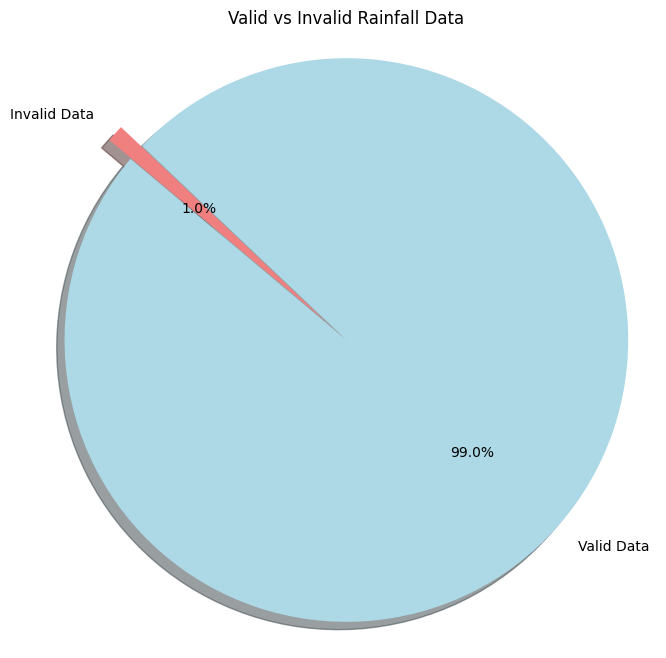

In [ ]:
import csv
import datetime
import matplotlib.pyplot as plt

class RainfallDataValidator:
    def __init__(self):
        self.valid_count = 0
        self.invalid_count = 0

    def validate_date(self, year, month, day):
        try:
            # Attempt to create a date object from the provided year, month, and day
            datetime.datetime(year, month, day)
            return True
        except ValueError:
            return False

    def validate_float(self, value):
        try:
            float(value)
            return True
        except ValueError:
            return False

    def validate_rainfall_data(self, data):
        # Validate each attribute of the rainfall data
        if not self.validate_date(int(data['year']), int(data['month']), int(data['day'])):
            self.invalid_count += 1
            return False
        if not self.validate_float(data['tempavg']):
            self.invalid_count += 1
            return False
        if not self.validate_float(data['DPavg']):
            self.invalid_count += 1
            return False
        if not self.validate_float(data['humidity avg']):
            self.invalid_count += 1
            return False
        if not self.validate_float(data['SLPavg']):
            self.invalid_count += 1
            return False
        if not self.validate_float(data['visibilityavg']):
            self.invalid_count += 1
            return False
        if not self.validate_float(data['windavg']):
            self.invalid_count += 1
            return False
        if not self.validate_float(data['Rainfall']):
            self.invalid_count += 1
            return False

        self.valid_count += 1
        return True

# Create an instance of the validator
validator = RainfallDataValidator()

# Open the CSV file and validate each row of data
with open('newdata.csv', 'r') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        validator.validate_rainfall_data(row)

# Plotting the pie chart
labels = ['Valid Data', 'Invalid Data']
sizes = [validator.valid_count, validator.invalid_count]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # explode the 1st slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Valid vs Invalid Rainfall Data')

plt.show()


TEST-TRAIN SPLIT

In [ ]:
from sklearn.model_selection import train_test_split         #performing train-test split.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20,random_state=42)

In [ ]:
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)


Shape of x_train: (4000, 7)
Shape of y_train: (4000,)


Random Forest

In [ ]:


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming you have already defined x_train, x_test, y_train, and y_test

# Create a RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=200, random_state=42)

# Fit the regressor to the training data
regressor.fit(x_train, y_train)

# Make predictions
train_pred = regressor.predict(x_train)
test_pred = regressor.predict(x_test)

# Calculate Mean Squared Error (MSE)
rf_train_mse = mean_squared_error(y_train, train_pred)
rf_test_mse = mean_squared_error(y_test, test_pred)

# Calculate R-squared
rf_train_r2 = r2_score(y_train, train_pred)
rf_test_r2 = r2_score(y_test, test_pred)

print("Training MSE:", rf_train_mse)
print("Testing MSE:", rf_test_mse)

print("Training R-squared:", rf_train_r2)
print("Testing R-squared:", rf_test_r2)




Training MSE: 5.269349316420339
Testing MSE: 29.250411501966877
Training R-squared: 0.8372024153840902
Testing R-squared: -0.14742132231224092


Linear Regression

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Linear Regression model
lin_reg = LinearRegression()

# Perform Recursive Feature Elimination (RFE)
num_features_to_select = 7  # Adjust based on your dataset
rfe = RFE(lin_reg, n_features_to_select=num_features_to_select)
X_train_rfe = rfe.fit_transform(x_train, y_train)
X_test_rfe = rfe.transform(x_test)

# Fit the model with the selected features
lin_reg.fit(X_train_rfe, y_train)

# Predictions on the training set
y_train_pred = lin_reg.predict(X_train_rfe)

# Predictions on the test set
y_test_pred = lin_reg.predict(X_test_rfe)

# Evaluation metrics for regression
lr_train_mae = mean_absolute_error(y_train, y_train_pred)
lr_test_mae = mean_absolute_error(y_test, y_test_pred)

lr_train_mse = mean_squared_error(y_train, y_train_pred)
lr_test_mse = mean_squared_error(y_test, y_test_pred)

print("Train Set MAE (with feature selection): {:.2f}".format(lr_train_mae))
print("Test Set MAE (with feature selection): {:.2f}".format(lr_test_mae))

print("Train Set MSE (with feature selection): {:.2f}".format(lr_train_mse))
print("Test Set MSE (with feature selection): {:.2f}".format(lr_test_mse))


Train Set MAE (with feature selection): 2.14
Test Set MAE (with feature selection): 2.16
Train Set MSE (with feature selection): 30.58
Test Set MSE (with feature selection): 23.68


XGB Regressor

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Assuming you have a DataFrame df with columns 'feature' and 'rainfall'
X = df.drop(columns=['Rainfall'])
y = df['Rainfall']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost regressor
model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the MSE
xgb_mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {xgb_mse}")

Mean Squared Error: 24.28942458419837


KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# Assuming you have your data loaded into a DataFrame
# X should contain the features, and y should contain the target variable
# Adjust this according to your actual data
X = df.drop(columns=['Rainfall'])
y = df['Rainfall']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create a KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=20)

# Train the regressor on the training data
knn_regressor.fit(X_train, y_train)

# Predict the target values for testing data
y_pred = knn_regressor.predict(X_test)

# Calculate Mean Squared Error
knn_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", knn_mse)


Mean Squared Error: 29.144960640375


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming you have already defined and preprocessed your data
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=10)

# Fit the model to the training data
dtr.fit(x_train, y_train)

# Make predictions on the training and test data
y_train_pred = dtr.predict(x_train)
y_test_pred = dtr.predict(x_test)

# Calculate Mean Squared Error
dt_train_mse = mean_squared_error(y_train, y_train_pred)
dt_test_mse = mean_squared_error(y_test, y_test_pred)

print("Train Set MSE: {:.2f}".format(dt_train_mse))
print("Test Set MSE: {:.2f}".format(dt_test_mse))


Train Set MSE: 20.30
Test Set MSE: 31.32


Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming you have your train and test data loaded into X_train, X_test, y_train, y_test
# Assuming you have already defined and preprocessed your data
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gradient Boosting Regressor model
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model to the training data
gb_regressor.fit(x_train, y_train)

# Make predictions on the training and test data
y_train_pred = gb_regressor.predict(x_train)
y_test_pred = gb_regressor.predict(x_test)

# Calculate Mean Squared Error
gb_train_mse = mean_squared_error(y_train, y_train_pred)
gb_test_mse = mean_squared_error(y_test, y_test_pred)

print("Train Set MSE: {:.2f}".format(gb_train_mse))
print("Test Set MSE: {:.2f}".format(gb_test_mse))


Train Set MSE: 27.01
Test Set MSE: 26.54




```
# This is formatted as code
```
Feed Forward Network

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error

# Assuming you have your dataset in a CSV file named 'rainfall_data.csv'
# Load the dataset
data = pd.read_csv('newdata.csv')

# Drop any rows with missing values
data.dropna(inplace=True)

# Extracting features and target variable
X = data[['tempavg', 'DPavg', 'humidity avg', 'SLPavg', 'visibilityavg', 'windavg']]
y = data['Rainfall']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Keras model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adamax')

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
keras_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", keras_mse)


Epoch 1/10
125/125 [==============================] - 2s 4ms/step - loss: 32.7331
Epoch 2/10
125/125 [==============================] - 1s 5ms/step - loss: 31.0773
Epoch 3/10
125/125 [==============================] - 1s 4ms/step - loss: 30.4551
Epoch 4/10
125/125 [==============================] - 1s 7ms/step - loss: 30.3119
Epoch 5/10
125/125 [==============================] - 1s 5ms/step - loss: 30.2556
Epoch 6/10
125/125 [==============================] - 1s 5ms/step - loss: 30.2345
Epoch 7/10
125/125 [==============================] - 1s 4ms/step - loss: 30.2202
Epoch 8/10
125/125 [==============================] - 0s 3ms/step - loss: 30.1866
Epoch 9/10
125/125 [==============================] - 1s 4ms/step - loss: 30.1739
Epoch 10/10
32/32 [==============================] - 0s 3ms/step
Mean Squared Error (MSE): 23.398554359621567


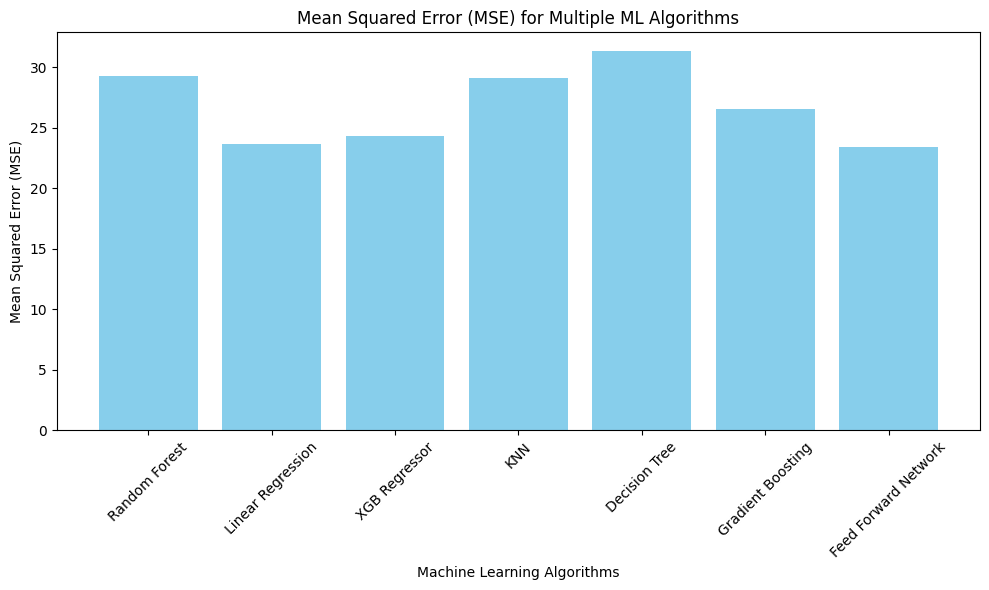

In [ ]:
import matplotlib.pyplot as plt

# List of machine learning algorithms
algorithms = ['Random Forest', 'Linear Regression', 'XGB Regressor', 'KNN','Decision Tree','Gradient Boosting','Keras Model']

# Corresponding Mean Squared Error (MSE) values
mse_values = [rf_test_mse, lr_test_mse, xgb_mse, knn_mse, dt_test_mse, sv_test_mse, gb_test_mse, keras_mse]  # Replace with your actual MSE values

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(algorithms, mse_values, color='skyblue')

# Adding titles and labels
plt.title('Mean Squared Error (MSE) for Multiple ML Algorithms')
plt.xlabel('Machine Learning Algorithms')
plt.ylabel('Mean Squared Error (MSE)')

# Displaying the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
